In [1]:
from easydict import EasyDict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlflow
import ipywidgets as widgets
from ipywidgets import interact

import seaborn as sns
from scipy.cluster import hierarchy

import datetime
import pytz
import os, sys

In [2]:
os.chdir(f"{os.environ['HOME']}/01_repos")
from paths import Paths
from CardiacMotionGWAS.helpers import EnsembleResults
from CardiacMotion.utils.run_helpers import Run, get_runs, compute_thickness_per_aha

2024-02-26 10:51:20 - INFO - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
2024-02-26 10:51:20 - INFO - Failed to load library ( 'libGLU.so.0' ): libGLU.so.0: cannot open shared object file: No such file or directory
2024-02-26 10:51:20 - INFO - Failed to load library ( 'libglut.so.0' ): libglut.so.0: cannot open shared object file: No such file or directory
2024-02-26 10:51:21 - INFO - Reading runs from cached file /home/user/01_repos/CardiacMotionGWAS/results/run_info.csv.
2024-02-26 10:51:37 - INFO - Found 225 runs. Cached file will be overwritten.


In [79]:
runs_df = get_runs(from_cached=True)

2024-02-26 23:39:04 - INFO - Reading runs from cached file /home/user/01_repos/CardiacMotionGWAS/results/run_info.csv.
2024-02-26 23:39:39 - INFO - Found 225 runs. Cached file will be overwritten.


In [4]:
ensemble_results = EnsembleResults(
    root_dir=f"{Paths.Data.gwas_results}/Unsupervised_spatiotemporal", 
    top_n_runs_per_chamber=None, from_cached=True
)

2024-02-26 10:51:55 - INFO - Loading cached results from /mnt/data/workshop/workshop-user1/output/GWAS/Unsupervised_spatiotemporal/region_assocs_df.pkl


In [87]:
ensemble_results.region_assocs_df[ensemble_results.region_assocs_df.chamber == "LA"].sort_values("P").head(40)

,pheno,region,CHR,SNP,BP,AF,a_0,a_1,BETA,SE,...,P,expid,chamber,run,full_pheno,INFO,variable_type,msd_static,msd_dynamic,rec_ratio
533184,z014,chr12_17,12,rs4963772,24758480.0,0.150220,G,A,-0.084568,0.009738,...,3.944573e-18,6,LA,a8742574ffe343969168e820a0d516c8,a8742574ffe343969168e820a0d516c8_z014,NaN,dynamic,0.905095,1.421587,0.485721
497883,z009,chr12_17,12,rs4963772,24758480.0,0.150220,G,A,-0.081322,0.009725,...,6.367955e-17,6,LA,6fa1322269a346f9bf6ecf7ef97f2d53,6fa1322269a346f9bf6ecf7ef97f2d53_z009,NaN,dynamic,1.165559,1.749322,0.596765
533763,z014,chr20_22,20,rs2881138,36834862.0,0.461590,A,G,-0.058270,0.007007,...,9.375620e-17,6,LA,a8742574ffe343969168e820a0d516c8,a8742574ffe343969168e820a0d516c8_z014,NaN,dynamic,0.905095,1.421587,0.485721
499836,z010,chr16_40,16,rs59686216,75317575.0,0.599760,A,G,-0.058554,0.007156,...,2.844461e-16,6,LA,6fa1322269a346f9bf6ecf7ef97f2d53,6fa1322269a346f9bf6ecf7ef97f2d53_z010,NaN,dynamic,1.165559,1.749322,0.596765
498315,z009,chr2_108,2,rs17362588,179721046.0,0.086989,G,A,0.096687,0.012125,...,1.570363e-15,6,LA,6fa1322269a346f9bf6ecf7ef97f2d53,6fa1322269a346f9bf6ecf7ef97f2d53_z009,NaN,dynamic,1.165559,1.749322,0.596765
534275,z014,chr6_82,6,rs1919865,122121005.0,0.135740,A,T,0.082867,0.010393,...,1.588547e-15,6,LA,a8742574ffe343969168e820a0d516c8,a8742574ffe343969168e820a0d516c8_z014,NaN,dynamic,0.905095,1.421587,0.485721
533340,z014,chr14_3,14,rs365990,23861811.0,0.369320,A,G,0.055967,0.007178,...,6.486344e-15,6,LA,a8742574ffe343969168e820a0d516c8,a8742574ffe343969168e820a0d516c8_z014,NaN,dynamic,0.905095,1.421587,0.485721
498974,z009,chr6_82,6,rs1919865,122121005.0,0.135740,A,T,0.079956,0.010380,...,1.361445e-14,6,LA,6fa1322269a346f9bf6ecf7ef97f2d53,6fa1322269a346f9bf6ecf7ef97f2d53_z009,NaN,dynamic,1.165559,1.749322,0.596765
441161,z005,chr2_108,2,rs17362588,179721046.0,0.086989,G,A,0.092826,0.012157,...,2.290868e-14,6,LA,4b20860d732741bd917a15edc7542b7b,4b20860d732741bd917a15edc7542b7b_z005,NaN,static,1.299022,1.877870,0.601511
497890,z009,chr12_23,12,rs11052736,33669583.0,0.455660,T,C,0.053012,0.006976,...,3.026913e-14,6,LA,6fa1322269a346f9bf6ecf7ef97f2d53,6fa1322269a346f9bf6ecf7ef97f2d53_z009,NaN,dynamic,1.165559,1.749322,0.596765


In [5]:
VARIABLE_TYPE = "dynamic"
idx_min_p_per_region = ensemble_results.region_assocs_df[(ensemble_results.region_assocs_df.P < 1e-9) & (ensemble_results.region_assocs_df.variable_type == VARIABLE_TYPE)].groupby(["region", "chamber"]).P.idxmin()

ensemble_results.region_assocs_df.loc[idx_min_p_per_region].to_csv(
    f"{Paths.Repos.CARDIAC_MOTION_GWAS}/results/best_assoc_per_region_only_dynamic.csv"
)

0 -3 119.629
1 0 120.64
2 3 120.515


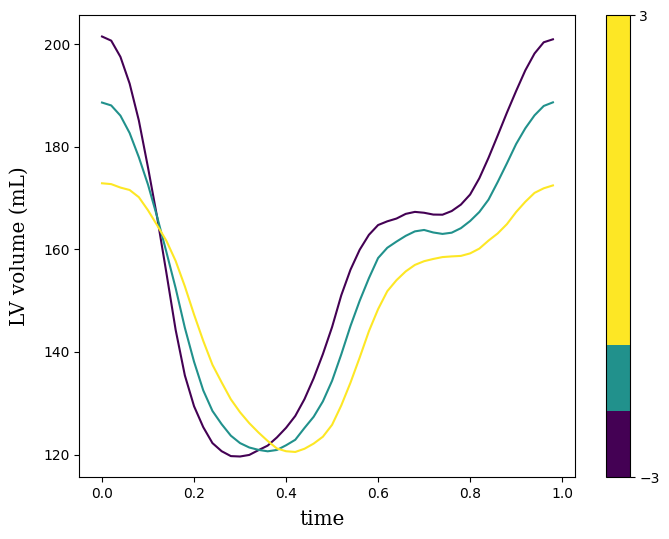

0 -3 0.0
1 0 0.0
2 3 0.0


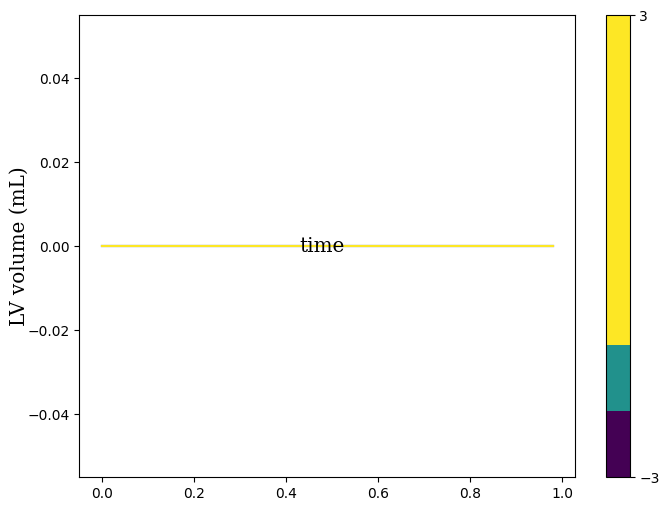

0 -3 115.89
1 0 115.071
2 3 117.582


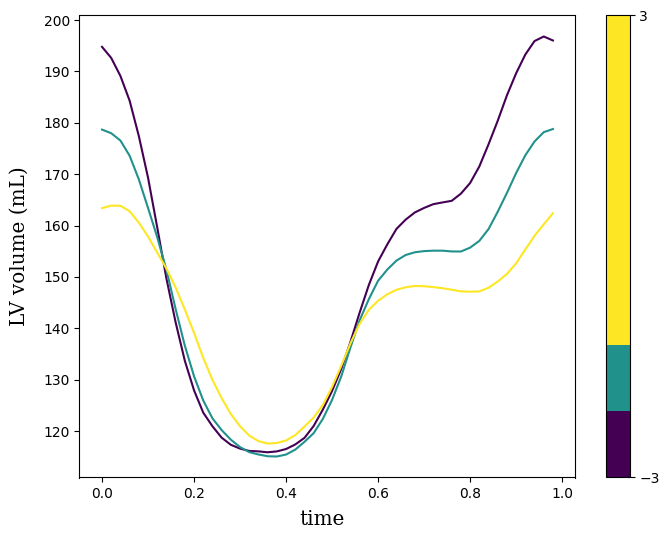

0 -3 0.0
1 0 0.0
2 3 0.0


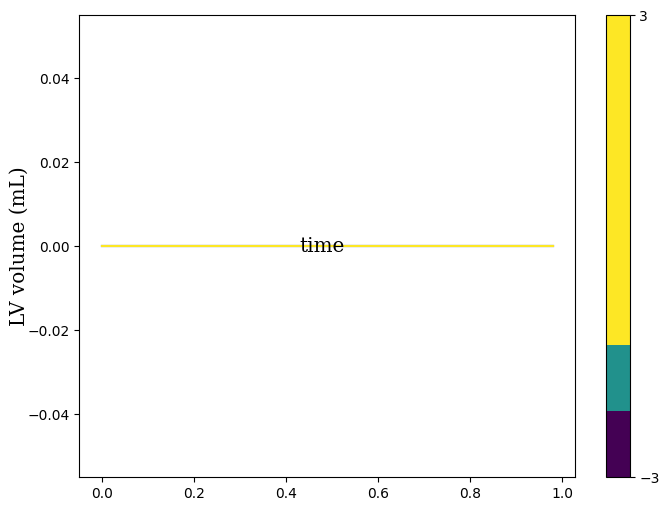

0 -3 0.0
1 0 0.0
2 3 0.0


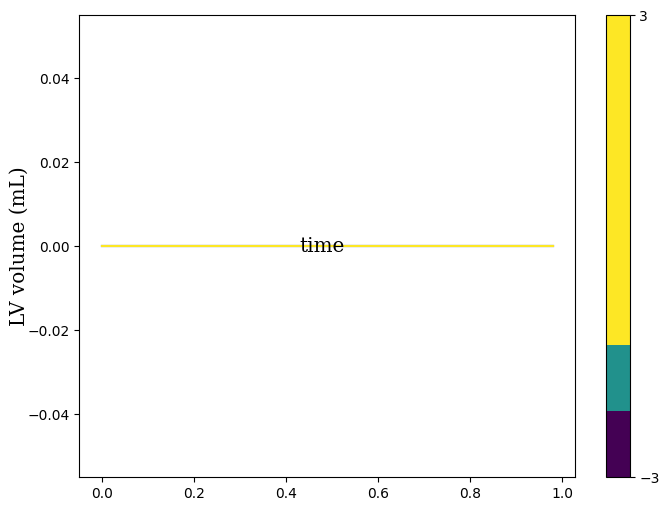

In [68]:
kk = ensemble_results.region_assocs_df[
    (ensemble_results.region_assocs_df.chamber == "LV") &
    (ensemble_results.region_assocs_df.variable_type == "dynamic") &
    (ensemble_results.region_assocs_df.region == "chr7_78")
].sort_values("P").head(5)

for index in kk.index:
    ensemble_results.region_assocs_df.loc[index]
    runid = ensemble_results.region_assocs_df.loc[index, "run"]
    zvar = ensemble_results.region_assocs_df.loc[index, "pheno"]
    runinfo = runs_df.loc[runid]
    run = Run(runinfo, load_model=False)
    run.plot_volume_curves(zvar=zvar)

In [6]:
ensemble_results.region_assocs_df.loc[idx_min_p_per_region].sort_values("P").head(50)

,pheno,region,CHR,SNP,BP,AF,a_0,a_1,BETA,SE,...,P,expid,chamber,run,full_pheno,INFO,variable_type,msd_static,msd_dynamic,rec_ratio
138305,z012,chr14_3,14,rs365990,23861811.0,0.369320,A,G,-0.072002,0.007190,...,1.399587e-23,4,LV,3dcf6f11e88c4aa886a4e99114bed84f,3dcf6f11e88c4aa886a4e99114bed84f_z012,NaN,dynamic,0.714291,1.144649,0.507603
37289,z011,chr12_17,12,rs4963772,24758480.0,0.150220,G,A,-0.096582,0.009741,...,3.784426e-23,3,RV,63b67e4bc99a4e5cba6cca13be52966e,63b67e4bc99a4e5cba6cca13be52966e_z011,NaN,dynamic,0.811321,1.226442,0.410839
630682,z015,chr12_17,12,rs4963772,24758480.0,0.150220,G,A,-0.091901,0.009715,...,3.250873e-21,7,RA,ecf5189409b34a48b80365c8a8c5f6b7,ecf5189409b34a48b80365c8a8c5f6b7_z015,NaN,dynamic,1.732509,2.292956,0.656430
1861070,z021,chr10_74,10,rs17617337,121426884.0,0.214640,C,T,-0.074891,0.007992,...,7.498942e-21,NaN,LV,4478fecff9f840f29797cd28fc84e6e2,4478fecff9f840f29797cd28fc84e6e2_z021,0.99440,dynamic,0.328243,0.936281,inf
2121134,z027,chr6_78,6,rs72967533,118655020.0,0.477410,T,C,-0.061112,0.006606,...,2.328091e-20,NaN,LV,d4a372ea29d8492592fae2971d274753,d4a372ea29d8492592fae2971d274753_z027,0.99207,dynamic,0.359540,0.781835,0.343003
609519,z014,chr3_28,3,rs6801957,38767315.0,0.596570,T,C,0.064239,0.007093,...,1.406048e-19,7,RA,d0f9a5af1a554f86a107319a8ceb19cd,d0f9a5af1a554f86a107319a8ceb19cd_z014,NaN,dynamic,1.774770,2.179437,0.573915
669345,z008,chr12_17,12,rs11047539,24781446.0,0.149610,A,G,-0.087610,0.009734,...,2.344229e-19,8,AO,f6549c1a0ef44033a996abc0825f7385,f6549c1a0ef44033a996abc0825f7385_z008,NaN,dynamic,0.809079,1.369405,0.445751
1774849,z019,chr6_79,6,rs4945623,118980556.0,0.453340,G,C,-0.059437,0.006606,...,2.393316e-19,NaN,LV,177d5968e4ba4aef8bced3e38e110762,177d5968e4ba4aef8bced3e38e110762_z019,0.99400,dynamic,0.611305,0.985543,0.425228
63590,z014,chr6_78,6,rs3951016,118559658.0,0.470720,T,A,-0.062320,0.007006,...,6.081350e-19,3,RV,84afed1478284b23af12da3e05f7de22,84afed1478284b23af12da3e05f7de22_z014,NaN,dynamic,0.944548,1.369728,0.478763
270948,z014,chr12_17,12,rs4963772,24758480.0,0.150220,G,A,-0.085711,0.009727,...,1.276439e-18,4,LV,b0e56885eace49de9ae80f7c81731ba1,b0e56885eace49de9ae80f7c81731ba1_z014,NaN,dynamic,0.566121,0.932896,0.393794


In [22]:
voxelized_shapes = run.load_voxelizations()

In [ ]:
filtered_shapes = voxelized_shapes[(voxelized_shapes.index.get_level_values("z_var") == z) & (voxelized_shapes.index.get_level_values("value") == j)]

# Volume curves for LA

In [90]:
runid = ensemble_results.region_assocs_df.iloc[499836].run

In [91]:
runid

'6fa1322269a346f9bf6ecf7ef97f2d53'

In [93]:
runinfo = runs_df.loc[runid]

In [97]:
run = Run(runinfo, load_model=True)

2024-02-26 23:45:35 - INFO - Loaded weights from checkpoint:
 /home/user/01_repos/CardiacMotion/mlruns/6/6fa1322269a346f9bf6ecf7ef97f2d53/artifacts/restored_model_checkpoint/epoch=398-step=292466.ckpt


In [99]:
z_grid = run.generate_synthetic_shapes_z_grid()

In [100]:
assoc_info = ensemble_results.region_assocs_df.loc[
    (ensemble_results.region_assocs_df.chamber == "LA") & 
    (ensemble_results.region_assocs_df.P < 5e-8) & 
    pd.Series(map(lambda x: x in {"chr12_40", "chr16_40"}, ensemble_results.region_assocs_df.region))
].sort_values("P").iloc[0]

In [72]:
ensemble_results.region_assocs_df.loc[
    (ensemble_results.region_assocs_df.chamber == "LA") & 
    (ensemble_results.region_assocs_df.P < 5e-8) & 
    pd.Series(map(lambda x: x in {"chr12_40", "chr16_40"}, ensemble_results.region_assocs_df.region))
].sort_values("P").drop(["pheno", "CHR", "expid", "run"], axis=1)

,region,SNP,BP,AF,a_0,a_1,BETA,SE,T,P,chamber,full_pheno,INFO,variable_type,msd_static,msd_dynamic,rec_ratio
499836,chr16_40,rs59686216,75317575.0,0.59976,A,G,-0.058554,0.007156,-8.1830,2.844461e-16,LA,6fa1322269a346f9bf6ecf7ef97f2d53_z010,NaN,dynamic,1.165559,1.749322,0.596765
454449,chr16_40,rs4888422,75470576.0,0.61452,A,G,-0.044027,0.007448,-5.9110,3.426100e-09,LA,4b20860d732741bd917a15edc7542b7b_z014,NaN,dynamic,1.299022,1.877870,0.601511
526732,chr16_40,rs150284594,75413242.0,0.59195,A,AAG,0.042027,0.007118,5.9041,3.573551e-09,LA,a8742574ffe343969168e820a0d516c8_z010,NaN,dynamic,0.905095,1.421587,0.485721
481099,chr12_40,rs761210718,66400702.0,0.36882,AAG,A,0.040962,0.007227,5.6682,1.452780e-08,LA,5e1b8110328348d8812e8b28b1bee177_z015,NaN,dynamic,1.141208,1.685662,0.586500
447479,chr12_40,rs10878359,66404624.0,0.62803,T,C,-0.040067,0.007171,-5.5875,2.317928e-08,LA,4b20860d732741bd917a15edc7542b7b_z010,NaN,dynamic,1.299022,1.877870,0.601511
531529,chr12_40,rs761210718,66400702.0,0.36882,AAG,A,0.040106,0.007223,5.5524,2.835959e-08,LA,a8742574ffe343969168e820a0d516c8_z013,NaN,dynamic,0.905095,1.421587,0.485721


In [103]:
runs_df = runs_df.set_index("run_id", drop=False)
runinfo = runs_df.loc[assoc_info.run]

In [117]:
from scipy.spatial import ConvexHull


In [126]:
def compute_convex_hull_volume(meshes):
    
    if isinstance(meshes, list) or len(meshes.shape) == 3:
        return [ compute_convex_hull_volume(mesh) for mesh in meshes ]
    
    elif len(meshes.shape) == 2:
        return ConvexHull(meshes).volume / 1000

In [127]:
shapes = list(run.generate_synthetic_shapes_z_grid().values())

In [128]:
compute_convex_hull_volume(shapes)

[[77.33269002128576,
  77.4657596762874,
  77.29192173080433,
  77.13185485815012,
  76.96495975405101,
  76.27528093666263,
  75.51817697134364,
  74.45198683204048,
  74.78906479051184,
  76.21775988029108,
  79.37476300260607,
  84.82283845606592,
  90.20800719582716,
  94.86371253522965,
  98.17348120622938,
  101.31674194341785,
  104.83643035846386,
  108.02773668842268,
  110.38193774641185,
  111.62868646881299,
  112.09422904571704,
  112.09763828071011,
  111.34655388099071,
  109.32883265664404,
  105.14265702899834,
  99.27641151808639,
  91.86145569050653,
  84.04510805744228,
  77.71977113524758,
  74.47945883990147,
  73.4686828181373,
  73.12313878989693,
  74.17862588308836,
  75.02453954985008,
  76.22067145842564,
  77.6999726479486,
  79.15767444368927,
  80.1541543104549,
  80.99028348665435,
  81.44821813383332,
  81.67868713037896,
  81.37391846334523,
  80.58470237618245,
  79.434620363026,
  78.5769559107733,
  78.03782196651758,
  78.2218434094505,
  78.395156

In [77]:
run.synthetic_shapes[("z015", 0)]

AttributeError: 'Run' object has no attribute 'synthetic_shapes'

In [75]:
time_axis = np.array(range(50))/50
plt.figure(figsize=(8, 6))

volume_for_lambda = {
    _lambda: [ x/1000 for x in compute_convex_hull_volume(run.synthetic_shapes[(assoc_info.pheno, _lambda)]) ]
    for _lambda in range(-3, 4)
}

num_colors = len(volume_for_lambda)
colors = plt.cm.get_cmap('viridis', num_colors)

min_volume = min(min(volume_for_lambda.values()))
max_volume = max(max(volume_for_lambda.values()))

for i, _lambda in enumerate(range(-3, 4)):
    plt.plot(time_axis, volume_for_lambda[_lambda], color=colors(i))
    
plt.text(-0.2, (min_volume+max_volume)/2, 'LA volume (mL)', va='center', rotation='vertical', fontfamily="serif", fontsize="x-large")
plt.text(0.43, min_volume - (max_volume-min_volume)*0.15, 'time', va='center', rotation='horizontal', fontfamily="serif", fontsize="x-large")
plt.show()

NameError: name 'compute_convex_hull_volume' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
regions = ["chr12_40", "chr1_124", "chr15_35", "chr7_78", "chr16_40", "chr6_7", "chr6_82", "chr12_2", "chr12_17", "chr12_23", "chr3_28", "chr8_82", "chr22_7", "chr20_22"]

@interact
def show_volume_curves_for_locus(region=widgets.Dropdown(options=regions)):
    
    assocs_for_region = ensemble_results.get_results_for_region(region, only_dynamic=True, exp_ids=["4","5"])
    runinfo = assocs_for_region.iloc[0]
    run = Run(runinfo, load_model=True, load_dataloader=False)
    
    global volumes
    volumes = run.plot_volume_curves(zvar=runinfo.pheno)
    thicknesses = run.compute_aha_thickness(zvar=runinfo.pheno, segments=1)
    
    display(
        results.region_assocs_df[
            (results.region_assocs_df.run == runinfo.run_id) & 
            (results.region_assocs_df.pheno == runinfo.pheno) & 
            (results.region_assocs_df.P < 5e-8) & (results.region_assocs_df.variable_type == "dynamic")
        ].sort_values("P")
    )

___

In [ ]:
x = next(iter(run.dataloader))['s_t'].to("cuda:0")
z, savg_hat, st_hat = run.model(x[:, range(0, 50, 5), :, :])

In [ ]:
subject = 4
thickness     = np.array(compute_thickness_per_aha(x.cpu().detach().numpy()[subject]))
thickness_hat = np.array(compute_thickness_per_aha(st_hat[subject].cpu().detach().numpy()))

In [ ]:
@interact
def show_curves(aha_segment=widgets.IntSlider(min=0,max=16)):
    plt.plot(thickness[:, aha_segment], color="blue");
    plt.plot(thickness_hat[:, aha_segment], color="red");

In [ ]:
time_axis = list(np.array(range(50))/50)

In [ ]:
# results = EnsembleResults(root_dir=f"{Paths.Data.gwas_results}/cardiac_indices_ed_and_es")

In [ ]:
# relevant_regions = set(ensemble_results.get_lead_snps().region)
# results_cardiac_indices = results.region_assocs_df[results.region_assocs_df.region.apply(lambda x: x in relevant_regions)]
# results_cardiac_indices = results_cardiac_indices[ results_cardiac_indices.pheno != "MEAN"]
# len(results_cardiac_indices.region.unique())

In [ ]:
(-np.log10(results_cardiac_indices.pivot(index="region", values="P", columns="run"))).to_csv(
    "/home/user/01_repos/CardiacMotionGWAS/results/log10p_cardiac_indices_ed_and_es.csv"
)